## Key concepts

Direct sample monte carlo
Markov chain monte carlo MCMC - metropolis algorithm
Global balance condition
Detailed balance condition
Homogeneous markov
Inhomogeneous markov
The metropolis acceptance criterion

In [16]:
%matplotlib inline
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt

A crucial lesson about sampling can be illustrated by the analogies:
    1. children playing in the sand - monte carlo circle
    2. adults playing in the monte carlo helipod
    
The famous 1/2 rule - how to choose the parameters of our monte carlo computations



## Direct Sampling - monte carlo beach analogy
Children play on the monte carlo beaches in the sand
They draw a circle inscribed in a square and throw pebbles randomly into the square

A pebble that lands in the square is called a TRIAL

A pebble that lands in the circle counts as a HIT

The children do a direct sampling monte carlo simulation and compute the number $\pi$ from the ratio of the area of the circle to the area of the square

This ratio is equal to $\pi /4$

eg. from 4000 trials, 3156 hits
To calculate pi:
$4 * N_{hits}/N_{trials} = 3.156$

In the limit of an infinitely long beach party and infinite number of pebbles, the exact value of pi will be computed

In python, we can write the following program:

In [8]:
### DIRECT SAMPLING! - when you don't do rejections in other words
import random

n_trials = 4000
n_hits = 0
for iter in range(n_trials):
    x, y = random.uniform(-1, 1), random.uniform(-1, 1) #key random number line that gives a random x, y coordinate inside the square
    if x**2 + y**2 < 1: #this is the circle equation to see if the point landed within the circle
        n_hits += 1
print 4*n_hits / float(n_trials)

3.159


In [80]:
### DIRECT SAMPLING! - multiple runs version - when you don't do rejections in other words
import random

def direct_pi(N):
    n_hits = 0
    for iter in range(n_trials):
        x, y = random.uniform(-1, 1), random.uniform(-1, 1) #key random number line that gives a random x, y coordinate inside the square
        if x**2 + y**2 < 1: #this is the circle equation to see if the point landed within the circle
            n_hits += 1
    return n_hits
n_runs = 10
n_trials = 4000
for run in range(n_runs):
    print 4*direct_pi(n_trials) / float(n_trials)

3.159
3.169
3.129
3.128
3.118
3.122
3.172
3.136
3.15
3.18


## Markov chain sampling - adults in the heliport

New analogy - the adults wander around the square shaped landing pad - much larger so they cant throw a pebble randomly into such a HUGE field, so they start in a corner and do a random walk

The aim of the game as before is to sweep out evenly the heliport square

What should we do when we throw a pebble outside the square? Should we continue inside the square as if nothing has happened or should we climb outside and continue the random walk until we come back into the square.

Solution - we come back to where we threw from and note that a stone went out of bounds - ie a rejection. And we continue with the next random walk step as if from the last step. 

In 1953, it was mindboggling that this famous Metropolis algorithm worked. 

Let's try running the markov chain sampling.

In [12]:
## markov chain sampling
import random
x, y = 1, 1
delta = 0.1 #the size of a random walk step (a stone throw)
n_trials = 4000
n_hits = 0
for i in range(n_trials):
    del_x, del_y = random.uniform(-delta,delta), random.uniform(-delta,delta) #this is a our random walk step, a random coordinate within the range of delta
    if abs(x + del_x) < 1 and abs(y + del_y) < 1: #here we check if we need to do a reject - ie is the random trial within the region we are interested in sampling?
        x,y = x + del_x, y + del_y #if no rejection, then update the current position
    if x**2 + y**2 < 1: n_hits += 1 #whatever the position was (inbounds or out) we still do the check for circle or square
print 4*n_hits / float(n_trials)

3.1715


## 3x3 Pebble Game & Detailed Balance Condition
This strategy of piling up pebbles, though strange, the output still comes out just right.

So why does the piling near the boundary strategy work? We want to pile up pebbles evenly around the square, so making piles seems strange. To understand why this strategy is ok, let's simplify it even further and consider a 3x3 pebble game.

A pebble in a cell can move up, down, right, left.

Below we show configuration $a$ of the pebble in the square:

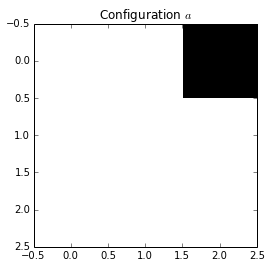

In [45]:
square = np.array([[0,0,1],[0,0,0],[0,0,0]])
plt.imshow(square, interpolation="nearest", cmap="Greys")
plt.title('Configuration $a$')

With our simple movement rules, from configuration $a$ we can only move left or down:

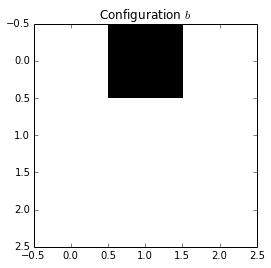

In [44]:
square = np.array([[0,1,0],[0,0,0],[0,0,0]])
plt.imshow(square, interpolation="nearest", cmap="Greys")
plt.title('Configuration $b$')

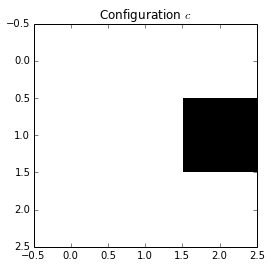

In [43]:
square = np.array([[0,0,0],[0,0,1],[0,0,0]])
plt.imshow(square, interpolation="nearest", cmap="Greys")
plt.title('Configuration $c$')

We can write this move into a little equation:

$p(a \rightarrow a)$ is the probability of staying in $a$

$p(a \rightarrow b)$ is the probability of moving to $b$

$p(a \rightarrow c)$ is the probability of moving to $c$

The total probability, which should sum to 1, is the sum of algorithmic transition probabilities - ie Markov property.

$p(a \rightarrow a) + p(a \rightarrow b) + p(a \rightarrow c)$


Now suppose that we have run this program long enough to reach a steady state. What then is the probability to be at configuration $a$ now that we have reached a steady state. 

It is the sum of all probabilities that transition to $a$. 
 comment - I guess these are all dependent on other probabilities though. This isn't a complete statement without information from the other adjacent states and the rest of the system.
 
$\pi _a = \pi _a p(a \rightarrow a) +  \pi _b p(b \rightarrow a) +  \pi _c p(c \rightarrow a)$

Notice $\pi _a$ is on both sides of the equation.

Let's do some rearrangement:

$\pi _a * 1 = \pi _a p(a \rightarrow a) +  \pi _b p(b \rightarrow a) +  \pi _c p(c \rightarrow a)$

Since all probabilities for a step from state a must sum to 1, we can place that at the implicit 1 next to the steady state $\pi _a$

$1 = p(a \rightarrow a) +  p(a \rightarrow b) +  p(a \rightarrow c)$

$\pi _a * (p(a \rightarrow a) + p(a \rightarrow b) + \pi _c p(a \rightarrow c)) = \pi _a p(a \rightarrow a) +  \pi _b p(b \rightarrow a) +  \pi _c p(c \rightarrow a)$

Note that the $p(a \rightarrow a)$ on both sides of the equation cancel out, and we're left with:

### the celebrated Global Balance Condition

$\pi _a p(a \rightarrow b) + \pi _a p(a \rightarrow c) = \pi _b p(b \rightarrow a) + \pi _c p(c \rightarrow a)$

What is this saying exactly? In words:
The joint probability of steady state probability of being in $a$ and a transition to $b$ next round plus the joint probability of being in $a$ at steady state with the probability of going to state $c$ is EQUAL to the joint probabilities of being in state $b$ and going to a plus that of being in state $c$ and going to $a$. 

More simply, the probability of being in state $a$ and leaving it to an adjacent state is balanced with the probability of being in an adjacent state and transitioning state $a$. 

Or finally, we are saying that the in and out transitions are balanced at steady state. There is no net flux toward a particular state. 


Our Monte Carlo algorithm, which is nothing more than the set of transition probabilities from one state to another, MUST SATISFY THE CONDITION, ie the equation above. 

There are many algorithms that satisfy the global balance condition.

One way to satisfy the condition, is by equating the a and b parts of the equation separately from the a and c parts:

### the  detailed balance condition
$\pi _a p(a \rightarrow b) = \pi _b p(b \rightarrow a)$

$\pi _a p(a \rightarrow c) = \pi _c p(c \rightarrow a)$

This version is really famous. What does it mean exactly and why is it important ?
In our 3x3 pebble game, we want to sweep out, evenly, all the configurations. How do we get an even sweep?

In probability terms, this is saying we want the steady state probabilities of being in each state to be equal - an even sweep.

$\pi _a = \pi _b = \pi _c$

This means, that somehow we need to make it so that the transition probabilities of in and out of each state are also equal - otherwise we violate the equations above. ie:

$p(a \rightarrow b) = p(b \rightarrow a)$

$p(a \rightarrow c) = p(c \rightarrow a)$

We need to rig our algorithm to have equal transition probabilites from state to state. First consider the middle square:

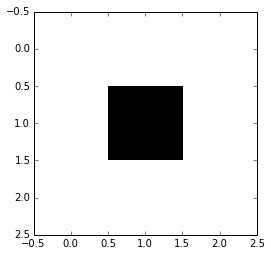

In [42]:
square = np.array([[0,0,0],[0,1,0],[0,0,0]])
plt.imshow(square, interpolation="nearest", cmap="Greys")
#plt.title('Configuration $ $')

Here we will say that the transition probabilities of going left, right, down, and up are each 0.25. ie all the allowed moves are equally likely and possible from this position.

Now let's introduce our simple solution to satisfy the global balance condition involving rejections. 

If we are at position $a$:

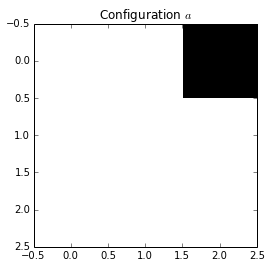

In [41]:
square = np.array([[0,0,1],[0,0,0],[0,0,0]])
plt.imshow(square, interpolation="nearest", cmap="Greys")
plt.title('Configuration $a$')

Then we reject the move to the right and up. We have a 0.5 probability for staying at site $a$, and the probability of moving to $b$ or $c$ is 0.25 each.

From position $b$ and $c$ we have a rejection probability each of 0.25.

This is the essence of the metropolis algorithm. 

We have just derived a markov chain monte carlo algorithm for the case when we sweep out all the configurations evenly. 



## Inhomogeneous pebble game and the Metropolis algorithm

Finally, let's consider the inhomogeneous case. Now instead of doing an even sweep, we will have statistical weights for each configuration. Shown below is the pebble grid drawn in blue to distinguish the statistical weighting from the "current state" representation in black and white above.



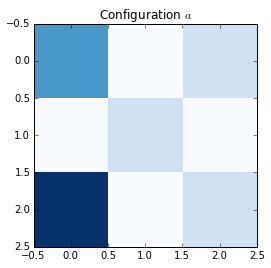

In [40]:
square = np.array([[2,0.5,1],[.5,1.0,0.5],[3.0,0.5,1.0]])
plt.imshow(square, interpolation="nearest", cmap="Blues")
plt.title('Configuration $a$')

So, at steady state, we should expect the pebble to spend twice as much time in the top left versus the top right for example.

To devise a markov chain monte carlo algorithm for this inhomogeneous scenario, we must revisit the detailed balance condition. 

$\pi _a p(a \rightarrow b) = \pi _b p(b \rightarrow a)$

$\pi _a p(a \rightarrow c) = \pi _c p(c \rightarrow a)$

We would violate this condition if we moved from $a$ to $b$ with the same probability as $b$ to $a$. 

Metropolis et al proposed the acceptance rule for the case of inhomogeneous steady state probabilities:

$ p(a \rightarrow b) = min\Big( 1, \frac{\pi (b)}{\pi (a)} \Big)  $

Stated in words, the probability of going from a to b is either 1 or the ratio of steady state probabilities b to a when the latter is less than 1. In the above grid, if we want to move from the top right corner which has a statistical weight of 1.0 to its left adjacent neighbor which has a statistical weight of 0.5, then the acceptance criterion is:

$min \Big( 1, \frac{0.5}{1} \Big)$

In otherwords, we should accept this proposed transition with a probability 0.5. Even though this is not a move into the boundary, there is still a chance for rejection here. Remember, that these moves are proposed according to their neighbor configuration still though - ie 0.25 in the case of a 2d grid as we have here. 



In [61]:
##basic pebble game
import random
neighbor = [[1,3,0,0],[2,4,0,1],[2,5,1,2], #each sub-array has an unmarked number identified by its listed order/index in the main matrix
            [4,6,3,0],[5,7,3,1],[5,8,4,2], #within subarrays, the elements are legal transitions to neighbor states
            [7,6,6,3],[8,7,6,4],[8,8,7,5]]
t_max = 15
site = 8
t = 0
print site
while t < t_max:
    t += 1
    site = neighbor[site][random.randint(0,3)]
    print site

8
8
5
5
2
2
2
2
1
1
2
2
5
8
5
4


In [81]:
## inhomogeneous basic pebble game
import random
histo = [0,0,0,0,0,0,0,0,0]
neighbor = [[1,3,0,0],[2,4,0,1],[2,5,1,2], #each sub-array has an unmarked number identified by its listed order/index in the main matrix
            [4,6,3,0],[5,7,3,1],[5,8,4,2], #within subarrays, the elements are legal transitions to neighbor states
            [7,6,6,3],[8,7,6,4],[8,8,7,5]]
weight = [3.0,0.5,1.0,0.5,1.0,0.5,2.0,0.5,1.0]
pos = 8
n_iter = 100
for iter in range(n_iter):
    new_pos = neighbor[pos][random.randint(0,3)] #again choose a legal neighbor transition via the array scheme
    if random.random() < weight[new_pos] / weight[pos]:
        pos = new_pos
    histo[pos] += 1
norm = sum(weight)
print 'comparison: weight, histogram'
for k in range(9):
    print 'site: ', k, 'weight: ', weight[k], 'histo: ', norm*histo[k]/float(n_iter)
#plt.scatter(weight,histo)

comparison: weight, histogram
site:  0 weight:  3.0 histo:  1.6
site:  1 weight:  0.5 histo:  0.3
site:  2 weight:  1.0 histo:  1.0
site:  3 weight:  0.5 histo:  0.3
site:  4 weight:  1.0 histo:  1.8
site:  5 weight:  0.5 histo:  0.9
site:  6 weight:  2.0 histo:  1.1
site:  7 weight:  0.5 histo:  0.3
site:  8 weight:  1.0 histo:  2.7
